Regression is used to find real values<br>
It gives a general formula for the dataset<br>
In this we calculate how much the difference in between the predicted value and the actual value for the whole dataset<br>
Difference between actual value and predicted value is called cost function<br>
Error is calculated for entire dataset using this cost function

In [1]:
import matplotlib.pyplot as plt
# Importing Libraries

To read CSV file

In [2]:
import pandas as pd
# For importing algorithm
from sklearn.linear_model import LinearRegression
# For splitting between training and testing
from sklearn.model_selection import train_test_split
# Importing accuracy score and mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error
# For plotting
import matplotlib.pyplot as plt
# For dimension reduction
from sklearn.decomposition import PCA

This dataset contains the years of experience and Salary of employees<br>
First column dosen't have any significance in data (Only used for Index)<br>
We can remove that<br>
To remove that we have two options

Method 1-By giving usecols arguments and only using required columns

In [3]:
data=pd.read_csv("Salary_dataset.csv",usecols=['YearsExperience','Salary'])
print(data)

    YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


Method 2-By using the index_col and setting it to 0 so that it doesn't take index

In [4]:
data=pd.read_csv("Salary_dataset.csv",index_col=0)
print(data)

    YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


Preprocessing<br>
Splitting between Input and Output

In [5]:
X,Y=data['YearsExperience'].to_numpy().reshape(-1,1),data['Salary'].to_numpy().reshape(-1,1)
print("Input is:\n",X)
print("\nOutput is:\n",Y)
print("Shape of Input data is:",X,"Shape of Output data is:",Y)

Input is:
 [[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]

Output is:
 [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]
 [105583.]
 [116970.]
 [112636.]
 [122392.]
 [121873.]]
Shape of Input data is: [[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]] Shape of Output data is: [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 6

Splitting into training and testing data<br>
we can do this directly as dataset is small instead of using train test split

In [6]:
x_train=X[:-5]
x_test=X[-5:]
y_train=Y[:-5]
y_test=Y[-5:]
print("Training data is:\n",x_train)
print("\nTesting data is:\n",y_train)
print("Shape of Training data is:",x_train.shape,"Shape of Testing data is:",y_train.shape)

Training data is:
 [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]
 [3. ]
 [3.1]
 [3.3]
 [3.3]
 [3.8]
 [4. ]
 [4.1]
 [4.1]
 [4.2]
 [4.6]
 [5. ]
 [5.2]
 [5.4]
 [6. ]
 [6.1]
 [6.9]
 [7.2]
 [8. ]
 [8.3]
 [8.8]]

Testing data is:
 [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]]
Shape of Training data is: (25, 1) Shape of Testing data is: (25, 1)


Choosing algorithm

In [7]:
reg=LinearRegression()
# Training data
reg.fit(x_train,y_train)

LinearRegression()

Evaluating model

In [8]:
print("Training Accuracy score is:",reg.score(x_train,y_train)*100)
# Checking predicted values
predict=reg.predict(x_test)
print("Predicted values are:\n")
print(predict)
# Checking predicted value for given value
print("Predicted value for 1.5 is:\n",reg.predict([[1.5]]))

Training Accuracy score is: 92.98889340527403
Predicted values are:

[[113773.84320812]
 [118768.07936621]
 [119766.92659783]
 [126758.85721916]
 [128756.55168239]]
Predicted value for 1.5 is:
 [[37861.45360513]]


print(accuracy_score(predict,y_test))-Doesn't work as accuracy score doesn't take array

Checking for Error

In [9]:
print("Mean Squared error is:",mean_squared_error(y_test,predict))
print("Mean Absolute error is:",mean_absolute_error(y_test,predict))

Mean Squared error is: 37525168.34948919
Mean Absolute error is: 5674.051614740992


Plotting<br>
We can see the points are much away from the line<br>
Cost function is very high<br>
This is why absolute and mean squared error is so high

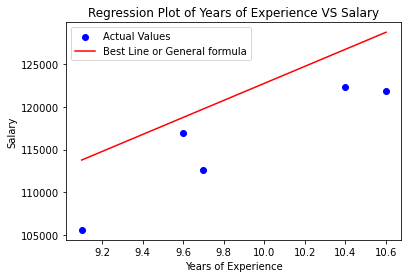

In [10]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,predict,color="red")
plt.title("Regression Plot of Years of Experience VS Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend(['Actual Values','Best Line or General formula'])
plt.show()

Trying for USA housing dataset<br>
area population(input) and price(output)

Since we need only two columns we will only import this two

In [11]:
df=pd.read_csv("USA_Housing.csv",usecols=['Area Population','Price'])
print("Dataset is:\n",df)
print("\nColumns are:\n",df.columns)
# Seeing dimension of column before reshaping
print("Dimension of Area Population column before reshaping to array is:",df['Area Population'].shape)
print("Dimension of Price column before reshaping to array is:",df['Price'].shape)

Dataset is:
       Area Population         Price
0        23086.800503  1.059034e+06
1        40173.072174  1.505891e+06
2        36882.159400  1.058988e+06
3        34310.242831  1.260617e+06
4        26354.109472  6.309435e+05
...               ...           ...
4995     22837.361035  1.060194e+06
4996     25616.115489  1.482618e+06
4997     33266.145490  1.030730e+06
4998     42625.620156  1.198657e+06
4999     46501.283803  1.298950e+06

[5000 rows x 2 columns]

Columns are:
 Index(['Area Population', 'Price'], dtype='object')
Dimension of Area Population column before reshaping to array is: (5000,)
Dimension of Price column before reshaping to array is: (5000,)


Preprocessing<br>
Splitting between Input and Output<br>
Columns are in dataframe ,thus they are in series format so we need to convert them to array and then also reshape them so that algorithm can use them

In [12]:
X,Y=df['Area Population'].to_numpy().reshape(-1,1),df['Price'].to_numpy().reshape(-1,1)
print("Input is:\n",X)
print("\nOutput is:\n",Y)
# Seeing dimension of column after reshaping
print("Shape of Input data(Area Population) is:",X.shape,"Shape of Output data(Price) is:",Y.shape)

Input is:
 [[23086.80050269]
 [40173.07217364]
 [36882.1593997 ]
 ...
 [33266.14548965]
 [42625.62015585]
 [46501.28380314]]

Output is:
 [[1059033.55787012]
 [1505890.91484695]
 [1058987.98787608]
 ...
 [1030729.58315229]
 [1198656.87240769]
 [1298950.48026696]]
Shape of Input data(Area Population) is: (5000, 1) Shape of Output data(Price) is: (5000, 1)


Splitting into training and testing data using train test split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
print("Training data is:\n",x_train)
print("\nTesting data is:\n",y_train)
print("Shape of Training data is:",x_train.shape,"Shape of Testing data is:",y_train.shape)

Training data is:
 [[27370.18571841]
 [55323.95725817]
 [46477.6786845 ]
 ...
 [44194.65851948]
 [39680.60932044]
 [52591.35747401]]

Testing data is:
 [[1273554.27783518]
 [1388840.17386976]
 [2152959.40894309]
 ...
 [1325354.50823022]
 [1064685.69873353]
 [1490718.33494934]]
Shape of Training data is: (4000, 1) Shape of Testing data is: (4000, 1)


Choosing algorithm

In [14]:
reg=LinearRegression()
# Training data
reg.fit(x_train,y_train)

LinearRegression()

Evaluating model<br>
Since the dataset is very big and we are only using one column accuracy is less

In [15]:
print("Training Accuracy score is:",reg.score(x_train,y_train)*100)
# Checking predicted values
predict=reg.predict(x_test)
print("Predicted values are:\n")
print(predict)
# Checking predicted value for given value
print("Predicted value for 1.5 is:\n",reg.predict([[1.5]]))

Training Accuracy score is: 16.589572962927278
Predicted values are:

[[1113643.14027487]
 [ 987645.30120151]
 [1018142.38852888]
 [1105170.59054994]
 [1405905.60533034]
 [1235077.67589722]
 [1191038.63224162]
 [1124367.76467271]
 [1224284.80506751]
 [ 987841.66373827]
 [1127329.52678931]
 [1332869.11934852]
 [1230304.17754071]
 [1255363.8524942 ]
 [1235239.99050498]
 [1322413.15856314]
 [1431576.14132535]
 [1408534.75295851]
 [1528134.01102317]
 [1356155.27119896]
 [1003503.7095975 ]
 [1190593.96267748]
 [1234577.65140486]
 [1188497.07649886]
 [1332548.78201118]
 [1327135.1589728 ]
 [1471953.82714084]
 [1042624.52822357]
 [1218973.19885072]
 [1293689.88367523]
 [1421910.43824984]
 [1299703.69130698]
 [1431388.53495889]
 [1125986.97431148]
 [1087747.67497334]
 [1037704.42091567]
 [1233860.22075416]
 [1069622.49791167]
 [1386706.18709927]
 [1100236.95907651]
 [1350946.44696588]
 [1179319.22868827]
 [1266361.08120814]
 [1155220.84275594]
 [1410109.83708058]
 [ 986181.70985947]
 [1099755.

print(accuracy_score(predict,y_test))-Doesn't work as accuracy score dosen't take array

Checking for Error<br>
Error is more as accuracy is less

In [16]:
print("Mean Squared error is:",mean_squared_error(y_test,predict))
print("Mean Absolute error is:",mean_absolute_error(y_test,predict))

Mean Squared error is: 107028639905.39874
Mean Absolute error is: 259985.40047332886


Plotting<br>
We can see the points are much away from the line<br>
Cost function is very high<br>
This is why absolute and mean squared error is so high

Text(0, 0.5, 'Price')

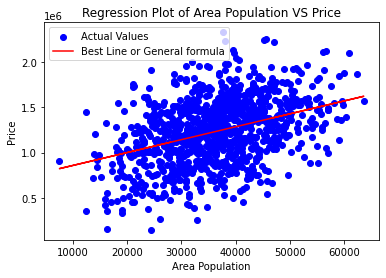

In [17]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,predict,color="red")
plt.legend(['Actual Values','Best Line or General formula'])
plt.title("Regression Plot of Area Population VS Price")
plt.xlabel("Area Population")
plt.ylabel("Price")
# plt.show()

Trying for USA housing dataset<br>
area population and all parameters(input) and price(output)

In [18]:
df=pd.read_csv("USA_Housing.csv")
print("Dataset is:\n",df)
print("\nColumns are:\n",df.columns)
# This column is not useful so we drop it
df=df.drop('Address',axis=1)
# Seeing dimension of column before reshaping
print("Dimension of Area Population column before reshaping to array is:",df['Area Population'].shape)
print("Dimension of Price column before reshaping to array is:",df['Price'].shape)

Dataset is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                            

Columns are in dataframe ,thus they are in series format so we need to convert them to array and then also reshape them so that algorithm can use them<br>
Function to reshape columns

In [19]:
func = lambda i:df[i].to_numpy().reshape(-1,1)
for i in df.columns:
    df[i]=func(i)
print("Dataset after reshaping is:\n",df)

Dataset after reshaping is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0             

Seeing dimension of column after reshaping

In [20]:
print("Dimension of Area Population column after reshaping to array is:",df['Area Population'].shape)
print("Dimension of Price column after reshaping to array is:",df['Price'].shape)

Dimension of Area Population column after reshaping to array is: (5000,)
Dimension of Price column after reshaping to array is: (5000,)


Preprocessing<br>
Splitting between Input and Output

In [21]:
X,Y=df.drop('Price',axis=1),df['Price']
print("Input is:\n",X)
print("\nOutput is:\n",Y)
print("\nShape of Input data is:",X.shape,"Shape of Output data is:",Y.shape)

Input is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09     23086.8

Splitting into training and testing data using train test split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
print("Training data is:\n",x_train)
print("\nTesting data is:\n",y_train)
print("Shape of Training data is:",x_train.shape,"Shape of Testing data is:",y_train.shape)

Training data is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
2720      66051.549770             7.465496                   7.795868   
4494      65126.703050             4.145069                   7.316436   
4738      62921.417525             6.097976                   7.662028   
228       66574.709994             5.550265                   6.844150   
699       80732.171302             8.151366                   7.106489   
...                ...                  ...                        ...   
3387      54600.194523             5.608723                   5.062462   
958       67424.188221             5.367616                   7.601754   
3980      72899.658203             5.222040                   6.861010   
901       89089.432075             7.146246                   9.179994   
2579      73956.991483             6.886298                   6.251239   

      Avg. Area Number of Bedrooms  Area Population  
2720                          6.49    

Choosing algorithm

In [23]:
reg=LinearRegression()
# Training data
reg.fit(x_train,y_train)

LinearRegression()

Evaluating model<br>
Since the dataset is very big and we are using all columns accuracy increases

In [24]:
print("Training Accuracy score is:",reg.score(x_train,y_train)*100)
# Checking predicted values
predict=reg.predict(x_test)
print("Predicted values are:\n")
print(predict)

Training Accuracy score is: 91.54039467405805
Predicted values are:

[ 654342.64103477  631797.16273741 1077686.8432453  1269022.8629051
 1173970.03552613 1690058.16536697 1372486.08020137  961696.07172504
 1216953.86746255 1205403.37680641  877270.29142746 1606508.273851
 1445642.553148   1436117.13831314 1219673.49054767  546402.3068935
 1363560.3124809   960436.89936437 1671370.72900873 1119362.29797146
 1748780.81227803 1308953.81432559 1468666.03860921 1579915.03417773
  541944.48605139 1718337.44849604 1149672.6521315   781859.92294578
 1451427.77832522  929549.48995108 1521526.09219002 1489139.99920233
 1063266.66864897 1616777.13160396 1123608.6931259   722759.3632804
 1084385.12008214  864673.13460792  708323.58370335  764956.96852573
 1797536.12364492 1081330.1300106  1548601.11281209 1535387.32790946
  939016.31078798 1146629.55011467 1314649.92239398  780773.74351426
  864356.17076505 1813617.3245314   984571.78908564 1122310.99982252
  838871.24925001 1071987.27044809 1132

Checking for Error<br>
Error is less as accuracy is more

In [25]:
print("Mean Squared error is:",mean_squared_error(y_test,predict))
print("Mean Absolute error is:",mean_absolute_error(y_test,predict))

Mean Squared error is: 9460338598.016909
Mean Absolute error is: 78195.8383472505


Plotting graph for complete dataset

PCA (Principle component analysis)- For Dimension reduction of data<br>
As we cannot plot with multiple dimensions thus dimensions will be reduced to 2

In [26]:
x=PCA(n_components=2)
# Transforming data
pca_data=x.fit_transform(X)
print("Transforming data\n",x.fit_transform(X))
print("\nShape of Transformed data is:\n",pca_data.shape)
print("\nTransformed Data is:\n",pca_data)

Transforming data
 [[-12355.34231389  11769.41434607]
 [-10150.51349937  -5176.60316217]
 [  7330.64748761    101.39871032]
 ...
 [  4836.0192449    3459.61287124]
 [  1300.45425077  -6356.57719758]
 [  4208.80933424  -9929.54125856]]

Shape of Transformed data is:
 (5000, 2)

Transformed Data is:
 [[-12355.34231389  11769.41434607]
 [-10150.51349937  -5176.60316217]
 [  7330.64748761    101.39871032]
 ...
 [  4836.0192449    3459.61287124]
 [  1300.45425077  -6356.57719758]
 [  4208.80933424  -9929.54125856]]


Transforming testing dataset

In [27]:
x=PCA(n_components=2)
pca_data_2 = x.fit_transform(x_test)
print("Transforming data\n",x.fit_transform(x_test))
print("\nShape of Transformed data is:\n",pca_data_2.shape)
print("\nTransformed Data is:\n",pca_data_2)

Transforming data
 [[  5840.10697418    179.76388602]
 [  5288.38005778 -16753.33316688]
 [  4249.83964931   5637.64885136]
 ...
 [ -5379.04002631  -6302.80380723]
 [-14907.94523764  -5675.81725761]
 [ 14822.68736947 -17819.63128259]]

Shape of Transformed data is:
 (1000, 2)

Transformed Data is:
 [[  5840.10697418    179.76388602]
 [  5288.38005778 -16753.33316688]
 [  4249.83964931   5637.64885136]
 ...
 [ -5379.04002631  -6302.80380723]
 [-14907.94523764  -5675.81725761]
 [ 14822.68736947 -17819.63128259]]


Plotting<br>
We can see the points are closer to line<br>
Cost function is very low<br>
This is why absolute and mean squared error is low<br>
Since we have multiple Independent Variable, the graph contains multiple regression lines

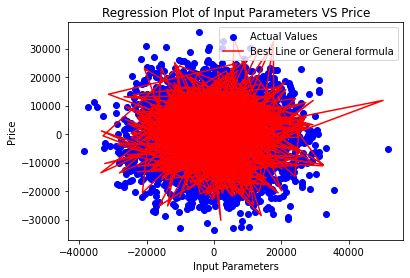

In [28]:
plt.scatter(pca_data[:,0],pca_data[:,1],color="blue")
plt.plot(pca_data_2[:,0],pca_data_2[:,1],color="red")
plt.legend(['Actual Values','Best Line or General formula'])
plt.title("Regression Plot of Input Parameters VS Price")
plt.xlabel("Input Parameters")
plt.ylabel("Price")
plt.show()